In [ ]:
import warnings
warnings. filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import string
import re
import nltk
import wordcloud
import tensorflow as tf
import contractions
import spacy
from collections import Counter
nlp = spacy.load("en_core_web_sm") ## load the spacy engisg language model

nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud, ImageColorGenerator
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from nltk.sentiment import SentimentIntensityAnalyzer

stop_words  = set(stopwords.words("english"))

In [4]:
data = pd.read_csv("/kaggle/input/chatgpt-twitter-dataset/chatgpt1.csv")


print("data shape:", data.shape)
print(data.info())
data.head()

data shape: (50001, 20)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Datetime        50001 non-null  object
 1   Tweet Id        50001 non-null  int64 
 2   Text            50001 non-null  object
 3   Username        50001 non-null  object
 4   Permalink       50001 non-null  object
 5   User            50001 non-null  object
 6   Outlinks        19942 non-null  object
 7   CountLinks      19942 non-null  object
 8   ReplyCount      50001 non-null  int64 
 9   RetweetCount    50001 non-null  int64 
 10  LikeCount       50001 non-null  int64 
 11  QuoteCount      50001 non-null  int64 
 12  ConversationId  50001 non-null  int64 
 13  Language        50001 non-null  object
 14  Source          50001 non-null  object
 15  Media           9502 non-null   object
 16  QuotedTweet     3563 non-null   object
 17  MentionedUsers  17169 non-

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2023-01-22 13:44:34+00:00,1617156270871699456,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...,mochico0123,https://twitter.com/mochico0123/status/1617156...,https://twitter.com/mochico0123,NaN,NaN,1,0,5,0,1617156270871699456,ja,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0
1,2023-01-22 13:44:39+00:00,1617156291046133761,@AlexandrovnaIng Prohibition of ChatGPT has be...,Caput_LupinumSG,https://twitter.com/Caput_LupinumSG/status/161...,https://twitter.com/Caput_LupinumSG,NaN,NaN,1,0,5,0,1617148639993806848,en,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,"[User(username='AlexandrovnaIng', id=282705900...",[],0
2,2023-01-22 13:44:44+00:00,1617156308926349312,"Schaut Euch an, was @fobizz @DianaKnodel alles...",ciffi,https://twitter.com/ciffi/status/1617156308926...,https://twitter.com/ciffi,['https://us02web.zoom.us/webinar/register/801...,"['https://t.co/DsoeVJrPBp', 'https://t.co/HflT...",0,0,4,0,1617156308926349312,de,"<a href=""http://twitter.com/#!/download/ipad"" ...",[Photo(previewUrl='https://pbs.twimg.com/media...,https://twitter.com/DianaKnodel/status/1617153...,"[User(username='fobizz', id=884708145792253952...",['#ChatGPT'],1
3,2023-01-22 13:44:49+00:00,1617156332297256961,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,Vishwasrisiri,https://twitter.com/Vishwasrisiri/status/16171...,https://twitter.com/Vishwasrisiri,['https://twitter.com/agadmator/status/1617155...,['https://t.co/ENTSzi2AQ9'],0,0,2,0,1617156332297256961,en,"<a href=""http://twitter.com/download/android"" ...",NaN,https://twitter.com/agadmator/status/161715501...,NaN,[],0
4,2023-01-22 13:44:52+00:00,1617156345064570880,"Profilinde vatan, Türkiye falan yazan bireyler...",0xGenetikciniz,https://twitter.com/0xGenetikciniz/status/1617...,https://twitter.com/0xGenetikciniz,NaN,NaN,0,0,4,0,1617156345064570880,tr,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,[],0


### Data Cleaning
1. Dropping irrelevant columns
2. checking for missing values

In [5]:
data = data.filter(["Text","LikeCount","RetweetCount","Language"])
data.head()

,Text,LikeCount,RetweetCount,Language
0,ChatGPTで遊ぶの忘れてた！！\n書類作るコード書いてみてほしいのと、\nどこまで思考整...,5,0,ja
1,@AlexandrovnaIng Prohibition of ChatGPT has be...,5,0,en
2,"Schaut Euch an, was @fobizz @DianaKnodel alles...",4,0,de
3,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,2,0,en
4,"Profilinde vatan, Türkiye falan yazan bireyler...",4,0,tr


In [6]:
data.isna().sum()

Text            0
LikeCount       0
RetweetCount    0
Language        0
dtype: int64

### Language count and Translating 
From the figure below, we can see that although there are other types of languages, English has the most count. 
I shall therefore drop texts that are not in english.

In [7]:
data["Language"].value_counts()

en    32076
ja     5046
es     3315
fr     2492
de     1207
      ...  
sd        1
am        1
hy        1
or        1
bn        1
Name: Language, Length: 61, dtype: int64

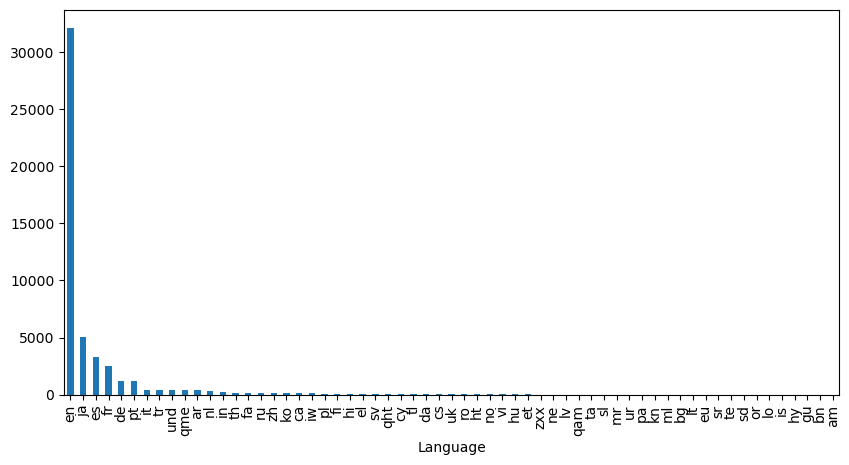

In [11]:
plt.figure(figsize=(10,5))
data.groupby(data["Language"]).count()["Text"].sort_values(ascending=False).plot.bar()
plt.show();

In [8]:
data.drop(data[data["Language"] !="en"].index, inplace=True)
data.reset_index(drop=True, inplace=True,)
data.head()

,Text,LikeCount,RetweetCount,Language
0,@AlexandrovnaIng Prohibition of ChatGPT has be...,5,0,en
1,Bow down to chatGPT 🫡..... https://t.co/ENTSzi...,2,0,en
2,ChatGPT runs 10K Nvidia training GPUs with pot...,0,0,en
3,@SWENGDAD There is repetitive work in every jo...,3,0,en
4,I created a fictional jewelry brand using Chat...,2,1,en


## Text Preprocessing
1. **Lower case conversion** - converting all letters to lower case so as to avoid redundancy in interpretation of both lower and upper case letters differently.

In [9]:
def convert_lowercase(Text):
    Text = Text. lower ()
    return Text

data["Text"] = data["Text"].apply (convert_lowercase)
data.head()
    

,Text,LikeCount,RetweetCount,Language
0,@alexandrovnaing prohibition of chatgpt has be...,5,0,en
1,bow down to chatgpt 🫡..... https://t.co/entszi...,2,0,en
2,chatgpt runs 10k nvidia training gpus with pot...,0,0,en
3,@swengdad there is repetitive work in every jo...,3,0,en
4,i created a fictional jewelry brand using chat...,2,1,en


2. **Expand contractions**
Contractions are words or combinations of words that are shortened by dropping letters and replacing them by an apostrophe, eg it's, I'll, won't...

NB: The expanded contractions will be effectively tokenized together eg; "I've" = "I have" instead of "I","have". Therefore I shall convert the lists in the Tweet column back to strings and tokenize later.

In [10]:
data["Text"] = data["Text"].apply(lambda x: [contractions.fix(word) for word in x.split()])
data['Text'] = [' '.join(map(str, l)) for l in data['Text']]
data.head()

,Text,LikeCount,RetweetCount,Language
0,@alexandrovnaing prohibition of chatgpt has be...,5,0,en
1,bow down to chatgpt 🫡..... https://t.co/entszi...,2,0,en
2,chatgpt runs 10k nvidia training gpus with pot...,0,0,en
3,@swengdad there is repetitive work in every jo...,3,0,en
4,i created a fictional jewelry brand using chat...,2,1,en


3. **Remove special characters and punctuations**

In [11]:
print(f'Special characters and punctuations to be removed:', string.punctuation)

def remove_punc(text):
    return text.translate(str.maketrans('','',string.punctuation))

data["Text"] = data["Text"].apply(remove_punc)
data.head() 

Special characters and punctuations to be removed: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


,Text,LikeCount,RetweetCount,Language
0,alexandrovnaing prohibition of chatgpt has bee...,5,0,en
1,bow down to chatgpt 🫡 httpstcoentszi2aq9,2,0,en
2,chatgpt runs 10k nvidia training gpus with pot...,0,0,en
3,swengdad there is repetitive work in every job...,3,0,en
4,i created a fictional jewelry brand using chat...,2,1,en


4. **Remove emojis and emoticons**

In [12]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

data["Text"] = data["Text"].apply(remove_emoji)

5. **Removing urls, mentions, hashtags, digits** and so on

In [13]:
def removes_unwanted(text):
    text = re.sub(r'http\S+','',text)            # urls
    text = re.sub(r'@\S+','',text)               # mentions
    text = re.sub(r'#\S+','',text)               #hashtags
    text = re.sub(r'(\d+)','',text)              #digits
    text = re.sub(r'(\(.\))|(\[.\])','',text)  #text in () or []
    text = re.sub(r'(\{.*\})','',text)           #text in {}
    text = re.sub(r'\n]','',text)                #new line characters
    text = re.sub(r'([\w\.\-\_]+@[\w\.\-\_]+)','',text)   #email address
    text = re.sub(r'[\$\d+\d+\$]','',text)                #currencies
    text = re.sub(r"\s+"," ", text)                   #extra space
    return text

data["Text"] = data["Text"].apply(removes_unwanted)
data.head()

,Text,LikeCount,RetweetCount,Language
0,alexandrovnaing prohibition of chatgpt has bee...,5,0,en
1,bow down to chatgpt,2,0,en
2,chatgpt runs k nvidia training gpus with poten...,0,0,en
3,swengdad there is repetitive work in every job...,3,0,en
4,i created a fictional jewelry brand using chat...,2,1,en


6. **Tokenization** - splitting up each of the headline into smaller units (words).
7. **Removing stopwords**

In [14]:
def customtokenize(str):
    tokens = word_tokenize(str)
    non_stopwords = list(filter(lambda token: token not in stop_words,tokens))
    return non_stopwords

data["Text"] = data["Text"].apply(customtokenize)
data["Text"] = data["Text"].apply(lambda l: " ".join(l))
data.head()

,Text,LikeCount,RetweetCount,Language
0,alexandrovnaing prohibition chatgpt added hono...,5,0,en
1,bow chatgpt,2,0,en
2,chatgpt runs k nvidia training gpus potential ...,0,0,en
3,swengdad repetitive work every job lots small ...,3,0,en
4,created fictional jewelry brand using chatgpt ...,2,1,en


8. **SpaCy Lemmatization**

In [15]:
data["Text"]=data["Text"].apply(lambda row: " ".join([w.lemma_ for w in nlp(row)]))
data.head()

,Text,LikeCount,RetweetCount,Language
0,alexandrovnae prohibition chatgpt add honor co...,5,0,en
1,bow chatgpt,2,0,en
2,chatgpt run k nvidia training gpu potential th...,0,0,en
3,swengdad repetitive work every job lot small t...,3,0,en
4,create fictional jewelry brand use chatgpt mid...,2,1,en


## Sentiment Analysis using Pretrained Model from Hugging Face

In [16]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [17]:
model = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model)
model = AutoModelForSequenceClassification.from_pretrained(model)

In [18]:
from textblob import TextBlob

In [19]:
def roberta_sentiment(text):
    b1 = TextBlob(text)
    tokens = tokenizer.encode (str (b1), return_tensors = "pt")
    result = model(tokens)
    point = int (np. argmax(result.logits.detach().numpy()))+1
    sentiment_string = ["Negative","Neutral","Positive"]
    sentiment = sentiment_string[point-1]
    return sentiment

In [22]:
sentiment_list = []
for i in text:
    sentiment_list.append(roberta_sentiment(i))
    
data["Sentiment"] = sentiment_list
data.head()

,Text,LikeCount,RetweetCount,Language,Sentiment
0,alexandrovnae prohibition chatgpt add honor co...,5,0,en,Neutral
1,bow chatgpt,2,0,en,Neutral
2,chatgpt run k nvidia training gpu potential th...,0,0,en,Neutral
3,swengdad repetitive work every job lot small t...,3,0,en,Neutral
4,create fictional jewelry brand use chatgpt mid...,2,1,en,Neutral


### Analysis of the results
1. From the`value_counts` bar plot, we can see that **Neutral entiments** are most common among all the Texts. They comprise of around 75% of the overall data.
Also the proportion of the **Positive sentiments**, around 15%, is higher than that for the **Negative sentiments** whic is around 8%

In [23]:
data["Sentiment"].value_counts()

Neutral     24447
Positive     4883
Negative     2746
Name: Sentiment, dtype: int64

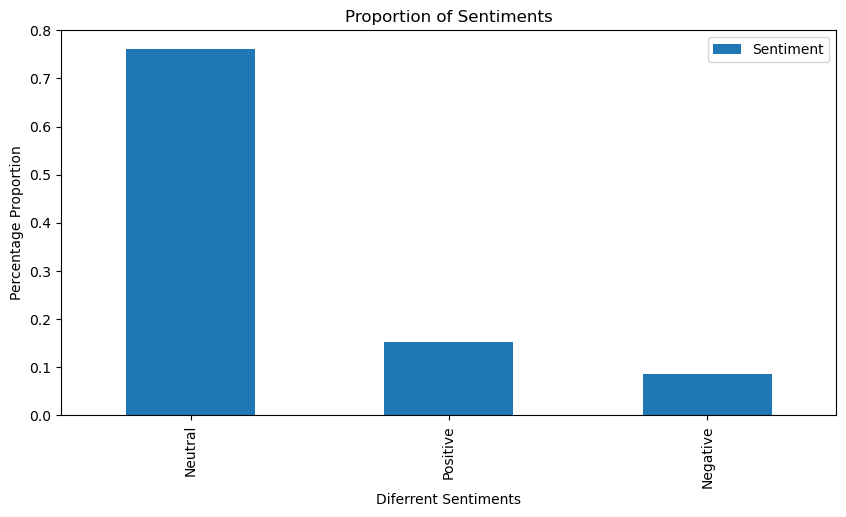

In [31]:
plt.figure(figsize=(10,5))
ax = data["Sentiment"].value_counts(normalize=True).plot(kind="bar",title="Proportion of Sentiments",legend=True)
plt.xlabel("Diferrent Sentiments")
plt.ylabel("Percentage Proportion");

### Visualizing World Cloud of each of the Positive and Negative Sentiments

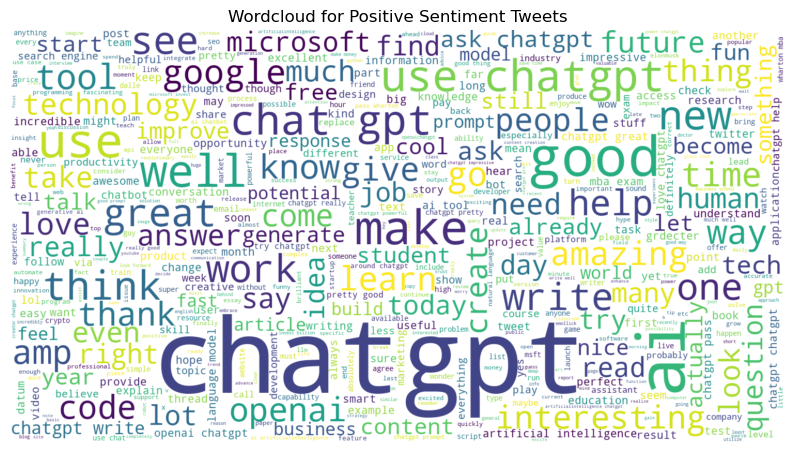

In [39]:
word_cloud_text = " ".join(data[data["Sentiment"]=="Positive"]["Text"])

wordcloud = WordCloud(width=1500, height=800, max_words=500, max_font_size=200, background_color= "white").generate(word_cloud_text)
                                   
plt.figure(figsize= (10, 10)) 
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis ('off')
plt.title("Wordcloud for Positive Sentiment Tweets")
plt.show()

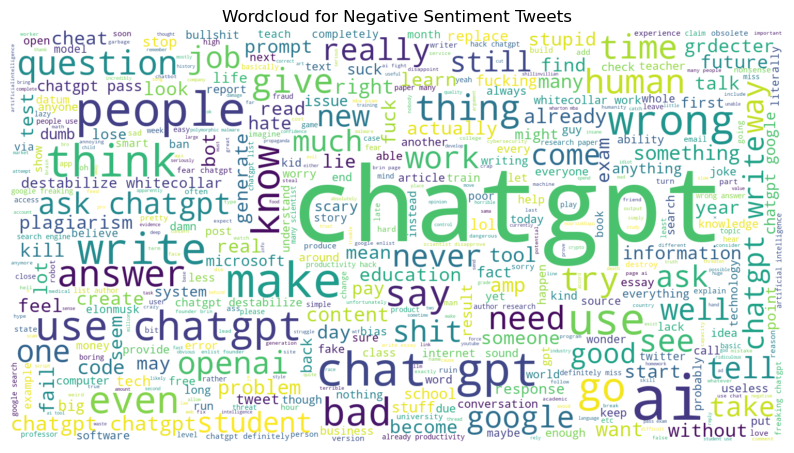

In [40]:
word_cloud_text = " ".join(data[data["Sentiment"]=="Negative"]["Text"])

wordcloud = WordCloud(width=1500, height=800, max_words=500, max_font_size=200, background_color= "white").generate(word_cloud_text)
                                   
plt.figure(figsize= (10, 10)) 
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis ('off')
plt.title("Wordcloud for Negative Sentiment Tweets")
plt.show()

### Word Frequency of the Positive and Negative Sentiments

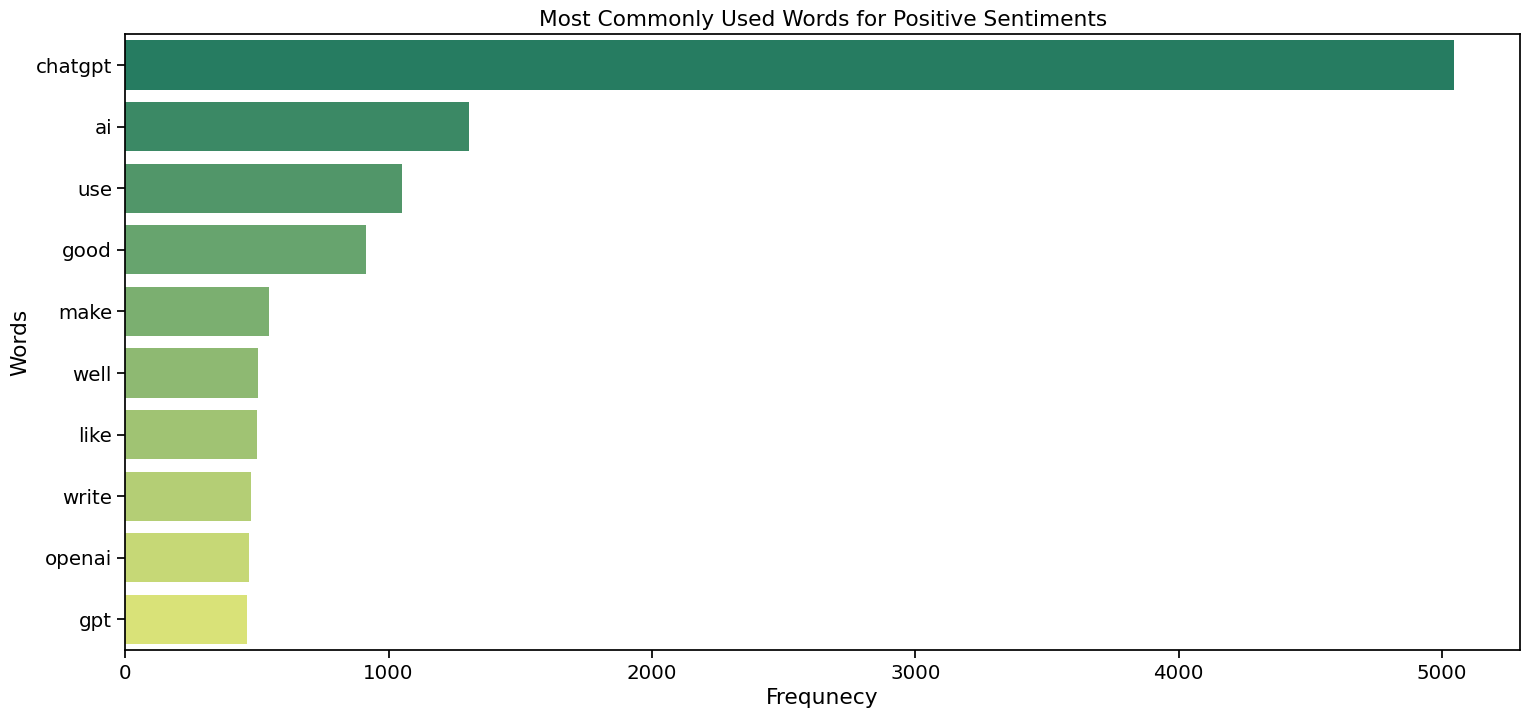

In [50]:
all_spam_words = []
for sentence in data[data['Sentiment'] == "Positive"]['Text' ].to_list():
    for word in sentence.split():
        all_spam_words.append(word)  


df = pd.DataFrame (Counter (all_spam_words).most_common (10), columns= ['Word', 'Frequency' ])

sns.set_context ('notebook', font_scale= 1.3)
plt.figure(figsize= (18, 8))
sns.barplot(y = df['Word'], x= df[ 'Frequency' ], palette= "summer")
plt.title ("Most Commonly Used Words for Positive Sentiments")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show();

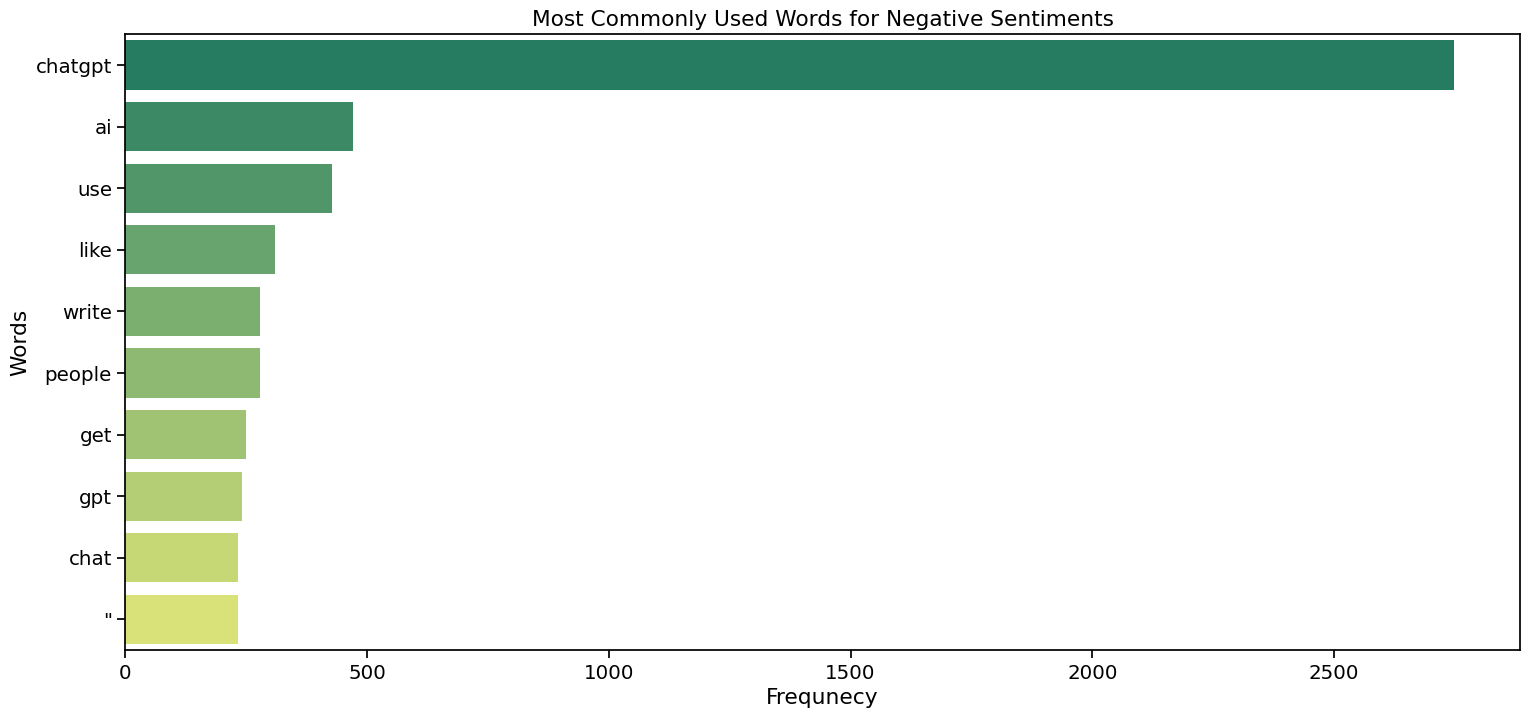

In [49]:
all_spam_words = []
for sentence in data[data['Sentiment'] == "Negative"]['Text' ].to_list():
    for word in sentence.split():
        all_spam_words.append(word)  


df = pd.DataFrame (Counter (all_spam_words).most_common (10), columns= ['Word', 'Frequency' ])

sns.set_context ('notebook', font_scale= 1.3)
plt.figure(figsize= (18, 8))
sns.barplot(y = df['Word'], x= df[ 'Frequency' ], palette= "summer")
plt.title ("Most Commonly Used Words for Negative Sentiments")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show();

### Visualizing the LikeCount by each Sentiment
We can see that Tweets with neutral sentiments had the most number of likes, followed by Tweets with Positive sentiments and lastly the negative sentiments.

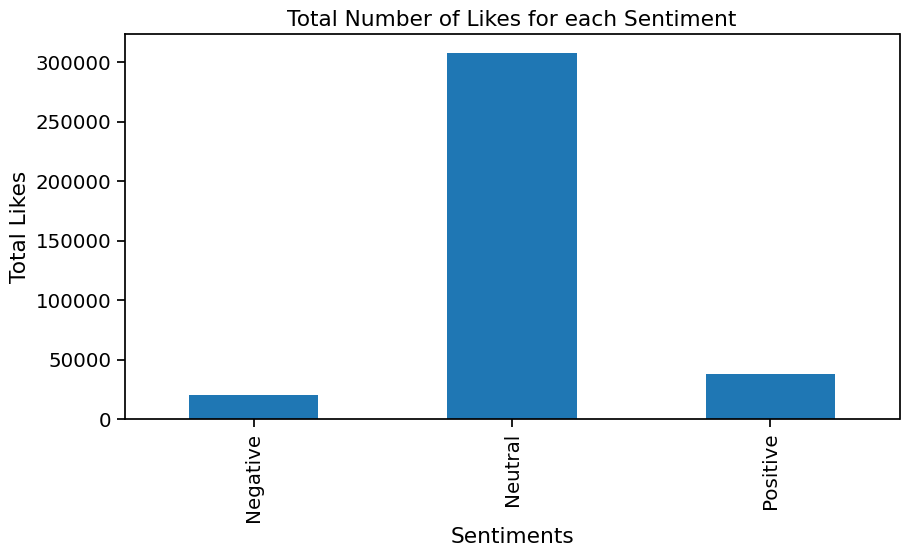

In [53]:
data1 = data.groupby("Sentiment")["LikeCount"].sum()
plt.figure(figsize= (10,5))
data1.plot.bar(title="Total Number of Likes for each Sentiment")
plt.xlabel("Sentiments")
plt.ylabel("Total Likes");

### Visualizing the RetweetCount by each Sentiment
We can also see that Tweets with neutral sentiments had the most number of Retweets, followed by Tweets with Positive sentiments and lastly the negative sentiments.

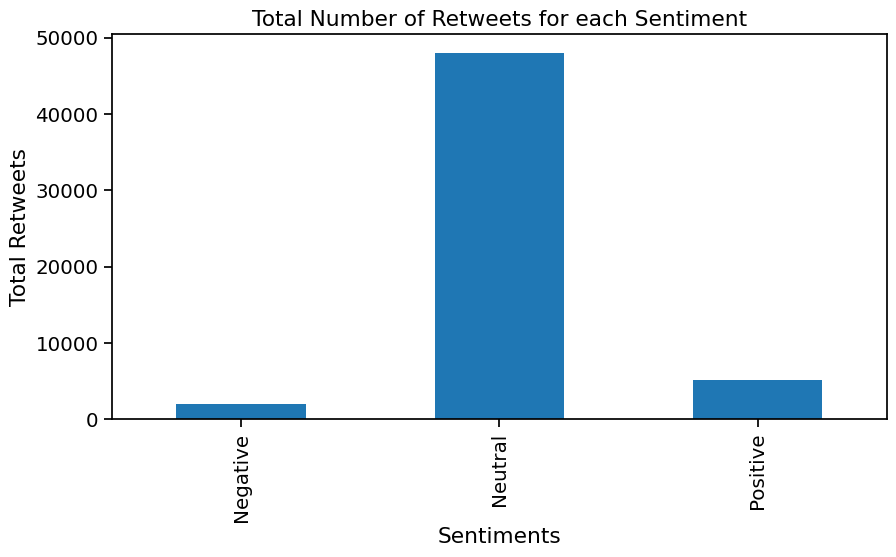

In [54]:
data1 = data.groupby("Sentiment")["RetweetCount"].sum()
plt.figure(figsize= (10,5))
data1.plot.bar(title="Total Number of Retweets for each Sentiment")
plt.xlabel("Sentiments")
plt.ylabel("Total Retweets");